In [1]:
import pandas
import numpy

In [2]:
data_frame = pandas.read_csv(r"F:\Naalaiya Thiran\Churn_Modelling.csv")

In [3]:
data_frame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
import seaborn
from matplotlib import pyplot

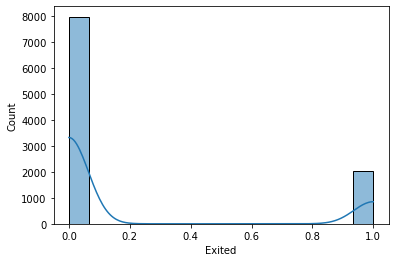

In [5]:
seaborn.histplot(data = data_frame['Exited'], kde = True)
pyplot.show()

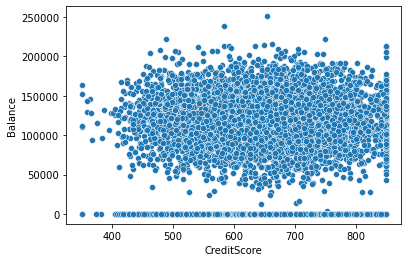

In [6]:
seaborn.scatterplot(data = data_frame, x = 'CreditScore', y = 'Balance')
pyplot.show()

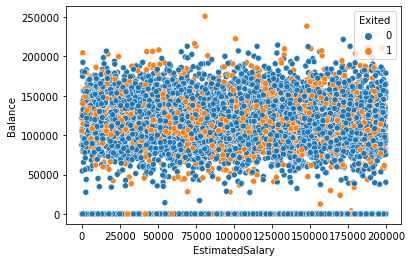

In [7]:
seaborn.scatterplot(data = data_frame, x = 'EstimatedSalary', y = 'Balance', hue = 'Exited')
pyplot.show()

In [8]:
data_frame.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data_frame.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [10]:
input_data = data_frame.iloc[:, 3:13]
result_data = data_frame.iloc[:, 13:14]

In [11]:
input_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [12]:
result_data

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [13]:
input_data = input_data.values
result_data = result_data.values

In [14]:
input_data

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [15]:
result_data

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [16]:
data_frame['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
data_frame['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
ct = ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder = "passthrough")
input_data = ct.fit_transform(input_data)

In [20]:
input_data[0:10, 1:2]

array([[0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0]], dtype=object)

In [21]:
input_data.shape

(10000, 13)

In [22]:
result_data.shape

(10000, 1)

In [23]:
from sklearn.model_selection import train_test_split
input_data_train,input_data_test,result_data_train,result_data_test = train_test_split(input_data,result_data,test_size = 0.3,random_state = 0)

In [24]:
input_data_train

array([[1.0, 0.0, 0.0, ..., 1, 1, 55796.83],
       [1.0, 0.0, 0.0, ..., 1, 0, 19823.02],
       [1.0, 0.0, 0.0, ..., 0, 1, 13848.58],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 0, 181429.87],
       [0.0, 0.0, 1.0, ..., 1, 1, 148750.16],
       [0.0, 1.0, 0.0, ..., 1, 0, 118855.26]], dtype=object)

In [25]:
input_data_train.shape

(7000, 13)

In [26]:
input_data_test

array([[0.0, 1.0, 0.0, ..., 1, 1, 192852.67],
       [1.0, 0.0, 0.0, ..., 1, 0, 128702.1],
       [0.0, 0.0, 1.0, ..., 1, 1, 75732.25],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 1, 167400.29],
       [1.0, 0.0, 0.0, ..., 1, 1, 70849.47],
       [0.0, 1.0, 0.0, ..., 1, 1, 33759.41]], dtype=object)

In [27]:
input_data_test.shape

(3000, 13)

In [28]:
result_data_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [29]:
result_data_train.shape

(7000, 1)

In [30]:
result_data_test

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [31]:
result_data_test.shape

(3000, 1)